# <span style="color:#F72585"><center>Introducción a la API Sequential de Keras</center></span>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Redes_Neuronales/Imagenes/Secuencia.png" width="600" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Secuencia_parcialidad_totalidad_parcialidad.png">Esteban J. Andrada</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

</center>

## <span style="color:#4361EE">Introducción</span>

Este es un notebook de Google Colaboratory. Los programas de Python se ejecutan directamente en tu navegador,  una gran manera de aprender y utilizar TensorFlow. 

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
print('Version de Tensorflow = ', tf.__version__)

c:\Users\User\anaconda3\envs\work\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Version de Tensorflow =  2.9.1


## <span style="color:#4361EE">Prepara datos de MNIST</span> 

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## <span style="color:#4361EE">Modelo Sequential de Keras</span> 


In [3]:
import tensorflow.keras.layers as layer

model = tf.keras.models.Sequential([
    layer.Flatten(input_shape=(28,28)), #784
    layer.Dense(128, activation='relu'),
    layer.Dropout(0.2),
    layer.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## <span style="color:#4361EE">Summary y Plot Model</span> 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='../Imagenes/mnist_dense.png', 
          show_shapes=True, show_dtype=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Puede necesitar instalar [graphviz](https://www.graphviz.org/).

In [6]:
#from plot_model import plot_model
#plot_model(model)

## <span style="color:#4361EE">Entrenamiento y evaluación del modelo</span> 

In [7]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2958 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1436 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9761


In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0764 - accuracy: 0.9751 - 915ms/epoch - 3ms/step


[0.07640121132135391, 0.9750999808311462]

## <span style="color:#4361EE">Primeros gráficos</span> 

### <span style="color:#4CC9F0">Extrae datos</span>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist

,loss,accuracy,epoch
0,0.295840,0.914933,0
1,0.143641,0.956733,1
2,0.108544,0.966417,2
3,0.087885,0.972900,3
4,0.075800,0.976050,4


### <span style="color:#4CC9F0">Pérdida</span>

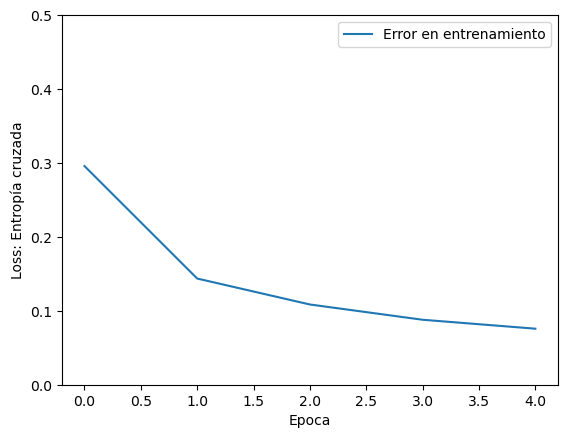

In [10]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Loss: Entropía cruzada')
plt.plot(hist['epoch'], hist['loss'],
           label='Error en entrenamiento')
plt.ylim([0,0.5])
plt.legend()
plt.show()

### <span style="color:#4CC9F0">Exactitud</span>

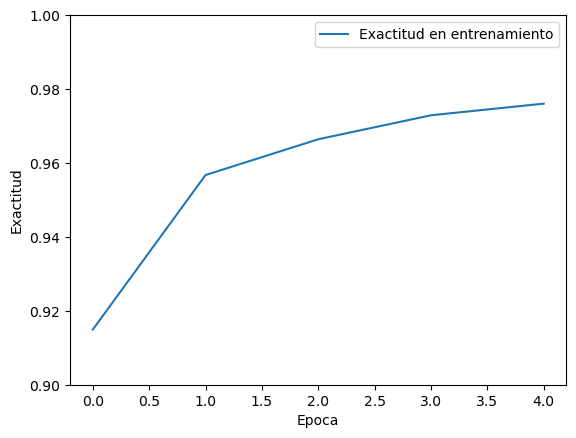

In [11]:

plt.figure()
plt.xlabel('Epoca')
plt.ylabel('Exactitud')
plt.plot(hist['epoch'], hist['accuracy'],
           label='Exactitud en entrenamiento')
plt.ylim([0.9,1])
plt.legend()
plt.show()